# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = ['dillingen', 'novara', 'butaritari', 'airai', 'portland', 'rikitea', 'venice', 'busselton', 'nome', 'albany', 'xining', 'mataura', 'palabuhanratu', 'cape town', 'chuy', 'umm lajj', 'barentsburg', 'kalmunai', 'hithadhoo', 'cauquenes', 'punta arenas', 'seredka', 'taolanaro', 'moose factory', 'kapaa', 'aksarka', 'bethel', 'leirvik', 'lavrentiya', 'burns lake', 'saint george', 'nikolskoye', 'bredasdorp', 'hilo', 'novonikolayevskiy', 'atuona', 'jamestown', 'awjilah', 'samusu', 'ribeira grande', 'pietarsaari', 'vaini', 'saldanha', 'berlevag', 'ketchikan', 'dianopolis', 'leh', 'tautira', 'otavi', 'clyde river', 'sao filipe', 'esterhazy', 'dunedin', 'pisco', 'saint-philippe', 'ushuaia', 'noumea', 'simbahan', 'hermanus', 'saint-georges', 'iroquois', 'port alfred', 'broken hill', 'tuktoyaktuk', 'gari', 'novyy urgal', 'pinotepa nacional', 'qaanaaq', 'castro', 'tumannyy', 'taoudenni', 'kozan', 'georgetown', 'carutapera', 'tsihombe', 'carnarvon', 'svetlogorsk', 'tolaga bay', 'dikson', 'jablanica', 'new norfolk', 'vestmannaeyjar', 'namatanai', 'santa fe', 'nabire', 'madimba', 'severo-kurilsk', 'rivera', 'fort saint james', 'kavieng', 'sopelana', 'christchurch', 'marcona', 'aksay', 'ambon', 'hobart', 'ponta do sol', 'mys shmidta', 'dingle', 'east london', 'mahebourg', 'roma', 'barrow', 'faanui', 'byron bay', 'bethanien', 'road town', 'luderitz', 'belushya guba', 'kaitangata', 'show low', 'bluff', 'port elizabeth', 'aquiraz', 'gumdag', 'beawar', 'longyearbyen', 'helong', 'umzimvubu', 'ngukurr', 'avarua', 'matara', 'chokurdakh', 'mar del plata', 'katsuura', 'beringovskiy', 'muisne', 'molteno', 'channel-port aux basques', 'ryotsu', 'attawapiskat', 'mecca', 'provideniya', 'asyut', 'nedjo', 'yellowknife', 'lagoa', 'sentyabrskiy', 'bouillante', 'paamiut', 'asosa', 'inyonga', 'georgiyevka', 'illoqqortoormiut', 'la ronge', 'premnitz', 'pospelikha', 'tsiroanomandidy', 'nouadhibou', 'arraial do cabo', 'parian dakula', 'corrales', 'vardo', 'sola', 'norman wells', 'terrace', 'goundam', 'chaman', 'hofn', 'filadelfia', 'prescott valley', 'manacapuru', 'hasaki', 'churapcha', 'deputatskiy', 'haines junction', 'rocha', 'lompoc', 'ancud', 'griffith', 'iquitos', 'guerrero negro', 'kodiak', 'juxtlahuaca', 'ilulissat', 'bambous virieux', 'coquimbo', 'lorengau', 'tuatapere', 'richards bay', 'blackwater', 'tasiilaq', 'wagar', 'santo antonio do sudoeste', 'vestmanna', 'longlac', 'torbay', 'mount gambier', 'amderma', 'flinders', 'talcahuano', 'grand river south east', 'tiksi', 'victoria', 'kembe', 'westport', 'piat', 'saleaula', 'ottawa', 'mahon', 'port lincoln', 'saskylakh', 'hlukhiv', 'grindavik', 'sangar', 'muravlenko', 'porto novo', 'port-louis', 'bengkulu', 'jiexiu', 'asayita', 'marin', 'wattegama', 'bilibino', 'cherskiy', 'husavik', 'umm kaddadah', 'nikko', 'surt', 'port hedland', 'inhambane', 'ayan', 'la asuncion', 'puerto ayora', 'mulege', 'cabo san lucas', 'yar-sale', 'lebu', 'santa cruz', 'north bend', 'inuvik', 'astana', 'kayes', 'sampit', 'cervo', 'sofiysk', 'samarai', 'rock sound', 'mehamn', 'kramat', 'mayor pablo lagerenza', 'ucluelet', 'aklavik', 'omsukchan', 'bodhan', 'upernavik', 'ozernovskiy', 'venado tuerto', 'howard springs', 'kruisfontein', 'buraydah', 'zhezkazgan', 'kirgiz-miyaki', 'polyarnyy', 'iqaluit', 'le mans', 'cidreira', 'constitucion', 'vetlanda', 'san javier', 'san quintin', 'garwa', 'oksfjord', 'karratha', 'liberty', 'luwuk', 'singkawang', 'saint anthony', 'egvekinot', 'kazalinsk', 'meybod', 'vaitupu', 'ostrovnoy', 'saint-paul', 'kakrala', 'nanfeng', 'lichuan', 'touho', 'susehri', 'three hills', 'cockburn harbour', 'kharakvasla', 'aleksandrovka', 'billings', 'pierre', 'joshimath', 'barcelos', 'jiroft', 'bismarck', 'toliary', 'nago', 'kenai', 'sarkand', 'kibakwe', 'yerbogachen', 'bhawanipatna', 'benghazi', 'kahului', 'lodwar', 'santo stino di livenza', 'wajir', 'ambulu', 'gorno-chuyskiy', 'nizhneyansk', 'bereda', 'sretensk', 'oranjestad', 'torata', 'cap malheureux', 'ahipara', 'abu zabad', 'makung', 'esperance', 'camacha', 'salvador', 'manicore', 'khatanga', 'marfino', 'fairbanks', 'motygino', 'eskisehir', 'belyy yar', 'ippy', 'san patricio', 'togur', 'brae', 'aswan', 'codrington', 'gulabpura', 'hamilton', 'leningradskiy', 'amasia', 'pekalongan', 'benxi', 'miri', 'akhtanizovskaya', 'antofagasta', 'hovd', 'urusha', 'kasempa', 'beisfjord', 'itarema', 'abaza', 'thompson', 'baykit', 'sindor', 'trincomalee', 'guadalupe y calvo', 'doha', 'hurup', 'geraldton', 'istok', 'davila', 'ahuimanu', 'touros', 'port macquarie', 'college', 'perry', 'dunkirk', 'kamenka', 'grand gaube', 'opuwo', 'marsh harbour', 'nemuro', 'chimbote', 'salamiyah', 'luanda', 'diu', 'conceicao do araguaia', 'nanortalik', 'los llanos de aridane', 'zudilovo', 'champerico', 'bentiu', 'rudnogorsk', 'borgo san dalmazzo', 'pimentel', 'sao jose da coroa grande', 'sao joao da barra', 'san jose', 'korla', 'bani', 'port keats', 'terracina', 'fresnillo', 'san pedro de macoris', 'osakarovka', 'fortuna', 'lovozero', 'kitamoto', 'sioux lookout', 'shitanjing', 'guozhen', 'minab', 'raymondville', 'nchelenge', 'mackay', 'half moon bay', 'boende', 'el wasta', 'ejido', 'puerto escondido', 'maradi', 'voskresenskoye', 'chantada', 'houma', 'bara', 'banjar', 'samalaeulu', 'labuhan', 'nassau', 'estepona', 'salta', 'seymchan', 'westerland', 'teguise', 'valparaiso', 'bandarbeyla', 'pangody', 'ilhabela', 'steamboat springs', 'brigantine', 'najran', 'fare', 'mafra', 'makakilo city', 'marawi', 'narsaq', 'coos bay', 'mikuni', 'adeje', 'yirol', 'bathsheba', 'satitoa', 'kavaratti', 'sitka', 'guaruja', 'pevek', 'ellensburg', 'lykhivka', 'krasnokamensk', 'azimur', 'savannah bight', 'leninskoye', 'samfya', 'yulara', 'do gonbadan', 'jinchang', 'kyritz', 'san policarpo', 'orlik', 'scarborough', 'tarudant', 'avera', 'pringsewu', 'aksu', 'tilichiki', 'ocampo', 'killybegs', 'taman', 'maniitsoq', 'kaeo', 'ileza', 'amapa', 'almaznyy', 'micheweni', 'kilimatinde', 'cap-aux-meules', 'karabash', 'otjiwarongo', 'batagay', 'mount pleasant', 'maxixe', 'mao', 'manado', 'bayanday', 'merauke', 'longjiang', 'kyabe', 'cordoba', 'tambacounda', 'argir', 'belaya gora', 'verkh-suetka', 'formoso do araguaia', 'sulangan', 'mbini', 'moerai', 'aiken', 'lazaro cardenas', 'alice springs', 'haradok', 'turukhansk', 'sur', 'port-cartier', 'bela', 'tateyama', 'okha', 'gat', 'george town', 'port blair', 'wainwright', 'petropavlovsk-kamchatskiy', 'boca do acre', 'vanimo', 'yuancheng', 'esmeraldas', 'rawson', 'henties bay', 'coihaique', 'oistins', 'anadyr', 'yomitan', 'mangrol', 'maloshuyka', 'takoradi', 'havre-saint-pierre', 'urengoy', 'glenwood springs', 'two hills', 'roald', 'padang', 'mrirt', 'viedma', 'tura', 'richmond', 'kidal', 'maroantsetra', 'kudahuvadhoo', 'pokhara', 'nurota', 'chicama', 'kirillov', 'rio gallegos', 'masuguru', 'tokonou', 'mae sai', 'kuliyapitiya', 'buzmeyin', 'souillac', 'buri', 'goderich', 'mangile', 'sharan', 'bethal', 'zeya', 'harper', 'serenje', 'lalitpur', 'vostok', 'montmagny', 'klaksvik', 'pacific grove', 'bolshaya atnya', 'doctor pedro p. pena', 'saint-louis', 'meyungs', 'mount isa', 'porbandar', 'tucurui', 'pozo colorado', 'cayenne', 'eldorado', 'bonavista', 'matozinhos', 'nuuk', 'neringa', 'khani', 'teguldet', 'broome', 'luganville', 'saryshagan', 'mana', 'tahe', 'gushikawa', 'palmer', 'la gaulette', 'carauari', 'joao pinheiro', 'orange', 'bull savanna', 'toftir', 'xuanzhou', 'aripuana', 'marseille', 'pontes e lacerda', 'harunabad', 'yandoon', 'tezu', 'hapur', 'meulaboh', 'bima', 'fukue', 'caravelas', 'rio grande', 'debre sina', 'chato', 'dutse', 'pasinler', 'narkevychi', 'tabou', 'guarapari', 'araouane', 'tukrah', 'groningen', 'kanker', 'lubango', 'caramay', 'shingu', 'vao', 'marystown']

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#      # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [113]:
#This section was purely to look at what the api returned. For all cities please go to next block.
url = 'http://api.openweathermap.org/data/2.5/weather?'
search_test = url + "appid=" + weather_api_key + "&q=" + cities[0]
weather_city_test = requests.get(search_test)
weather_city_json = weather_city_test.json()
weather = json.dumps(weather_city_json, indent = 3, sort_keys = True)
print(weather)

{
   "base": "stations",
   "clouds": {
      "all": 83
   },
   "cod": 200,
   "coord": {
      "lat": 49.35,
      "lon": 6.7333
   },
   "dt": 1667603206,
   "id": 2936977,
   "main": {
      "feels_like": 281.99,
      "grnd_level": 993,
      "humidity": 99,
      "pressure": 1015,
      "sea_level": 1015,
      "temp": 281.99,
      "temp_max": 282.56,
      "temp_min": 281.7
   },
   "name": "Dillingen",
   "rain": {
      "1h": 0.15
   },
   "sys": {
      "country": "DE",
      "id": 2009774,
      "sunrise": 1667629635,
      "sunset": 1667664362,
      "type": 2
   },
   "timezone": 3600,
   "visibility": 10000,
   "weather": [
      {
         "description": "light rain",
         "icon": "10n",
         "id": 500,
         "main": "Rain"
      }
   ],
   "wind": {
      "deg": 287,
      "gust": 1.3,
      "speed": 0.96
   }
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
url = 'https://api.openweathermap.org/data/2.5/weather?'
my_cities = []
latitude = []
longitude = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

print('Beginning data retrieval')
print('-'*30)
for city in cities:
    
    search = url + "appid=" + weather_api_key + "&q=" + city
    weather_city = requests.get(search).json()
    
    try:
        latitude.append(weather_city['coord']['lat'])
        longitude.append(weather_city['coord']['lon'])
        Max_Temp.append(weather_city['main']['temp_max'])
        Humidity.append(weather_city['main']['humidity'])
        Cloudiness.append(weather_city['clouds']['all'])
        Wind_speed.append(weather_city['wind']['speed'])
        Country.append(weather_city['sys']['country'])
        Date.append(weather_city['dt'])
        print(f'{city} found')
        my_cities.append(city)
    except:
        print(f'{city} not found')


Beginning data retrieval
------------------------------
dillingen found
novara found
butaritari found
airai found
portland found
rikitea found
venice found
busselton found
nome found
albany found
xining found
mataura found
palabuhanratu not found
cape town found
chuy found
umm lajj found
barentsburg not found
kalmunai found
hithadhoo found
cauquenes found
punta arenas found
seredka found
taolanaro not found
moose factory found
kapaa found
aksarka found
bethel found
leirvik found
lavrentiya found
burns lake found
saint george found
nikolskoye found
bredasdorp found
hilo found
novonikolayevskiy found
atuona found
jamestown found
awjilah found
samusu not found
ribeira grande found
pietarsaari found
vaini found
saldanha found
berlevag found
ketchikan found
dianopolis not found
leh found
tautira found
otavi found
clyde river found
sao filipe found
esterhazy found
dunedin found
pisco found
saint-philippe found
ushuaia found
noumea found
simbahan found
hermanus found
saint-georges found
iroqu

mangrol found
maloshuyka not found
takoradi found
havre-saint-pierre found
urengoy found
glenwood springs found
two hills found
roald found
padang found
mrirt not found
viedma found
tura found
richmond found
kidal found
maroantsetra found
kudahuvadhoo found
pokhara found
nurota found
chicama found
kirillov found
rio gallegos found
masuguru found
tokonou found
mae sai found
kuliyapitiya found
buzmeyin found
souillac found
buri found
goderich found
mangile not found
sharan found
bethal found
zeya found
harper found
serenje found
lalitpur found
vostok found
montmagny found
klaksvik found
pacific grove found
bolshaya atnya not found
doctor pedro p. pena not found
saint-louis found
meyungs not found
mount isa found
porbandar found
tucurui found
pozo colorado found
cayenne found
eldorado found
bonavista found
matozinhos found
nuuk found
neringa found
khani found
teguldet found
broome found
luganville found
saryshagan not found
mana found
tahe found
gushikawa found
palmer found
la gaulette no

In [7]:
print(len(my_cities))
print(len(latitude))
print(len(longitude))
print(len(Max_Temp))
print(len(Humidity))
print(len(Cloudiness))
print(len(Wind_speed))
print(len(Country))
print(len(Date))

564
564
564
564
564
564
564
564
564


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_frame = pd.DataFrame({'Cities':my_cities,'Latitude':latitude, 'Longitude': longitude,
                           'Max temperature': Max_Temp, 'Humidity': Humidity, 'Cloudiness':Cloudiness, 
                           'Wind Speed': Wind_speed, 'Country': Country,'Date':Date})
city_frame.head()

,Cities,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,dillingen,49.3500,6.7333,283.62,99,67,1.10,DE,1667588975
1,novara,45.5853,8.5778,285.98,80,0,1.54,IT,1667588722
2,butaritari,3.0707,172.7902,299.51,74,99,3.44,KI,1667588977
3,airai,-8.9266,125.4092,288.91,83,71,0.82,TL,1667588931
4,portland,45.5234,-122.6762,286.77,92,100,6.71,US,1667588911


In [115]:
city_frame.to_csv("city_frame.csv", index=False, header=True)

In [6]:
city_frame.describe()
#the dataframe contains places with 100% humidity

,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,21.187593,15.281591,287.237270,70.677305,56.570922,3.518227,1.667589e+09
std,33.103719,90.436812,13.329176,21.287062,41.847778,2.453632,1.016040e+02
min,-54.800000,-179.166700,244.950000,8.000000,0.000000,0.000000,1.667588e+09
25%,-6.746700,-63.274675,279.242500,59.000000,10.000000,1.607500,1.667589e+09
50%,26.735700,21.255800,290.955000,76.000000,70.000000,2.915000,1.667589e+09
75%,48.943025,88.029150,297.612500,86.250000,100.000000,4.745000,1.667589e+09
max,78.218600,179.316700,307.600000,100.000000,100.000000,15.550000,1.667589e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid100 = city_frame.loc[city_frame['Humidity'] == 100]
humid100

,Cities,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
140,terrace,54.5163,-128.6035,275.10,100,100,1.03,CA,1667589028
148,churapcha,62.0025,132.4325,250.67,100,98,1.95,RU,1667589030
276,bereda,43.2686,-7.5406,282.91,100,42,0.67,ES,1667589070
287,khatanga,71.9667,102.5000,246.78,100,65,0.83,RU,1667589074
447,belaya gora,68.5333,146.4167,244.95,100,98,0.74,RU,1667588877
466,petropavlovsk-kamchatskiy,53.0452,158.6483,271.48,100,75,1.00,RU,1667589142
482,roald,62.5833,6.1333,283.80,100,75,1.03,NO,1667589148


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_frame.loc[city_frame['Humidity'] != 100]
clean_city_data['Max Temperature (F)']= (clean_city_data['Max temperature']-273.15)*(9/5)+32
clean_city_data.head()

D:\school files\Certificate course\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Cities,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temperature (F)
0,dillingen,49.3500,6.7333,283.62,99,67,1.10,DE,1667588975,50.846
1,novara,45.5853,8.5778,285.98,80,0,1.54,IT,1667588722,55.094
2,butaritari,3.0707,172.7902,299.51,74,99,3.44,KI,1667588977,79.448
3,airai,-8.9266,125.4092,288.91,83,71,0.82,TL,1667588931,60.368
4,portland,45.5234,-122.6762,286.77,92,100,6.71,US,1667588911,56.516


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

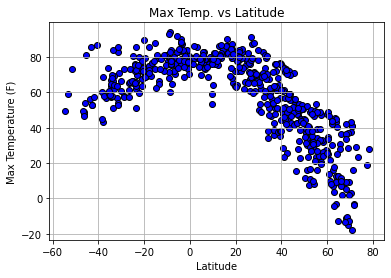

In [34]:
x_axislat = clean_city_data['Latitude']
y_axismaxtemp = clean_city_data['Max Temperature (F)']
plt.scatter(x_axislat,y_axismaxtemp, color = 'blue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temp. vs Latitude')
plt.grid()
plt.savefig('Lat vs Max_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

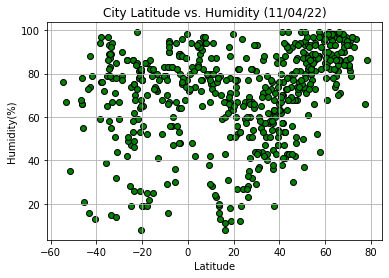

In [23]:
y_axishumid = clean_city_data['Humidity']
plt.scatter(x_axislat, y_axishumid, color = 'green', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (11/04/22)')
plt.grid()
plt.savefig('Lat vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

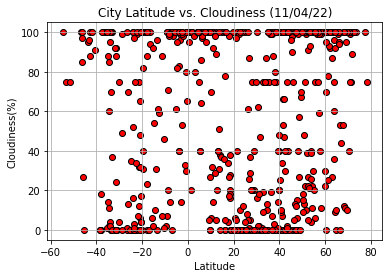

In [24]:
y_axiscloud = clean_city_data['Cloudiness']
plt.scatter(x_axislat, y_axiscloud, color = 'red', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (11/04/22)')
plt.grid()
plt.savefig('Lat vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

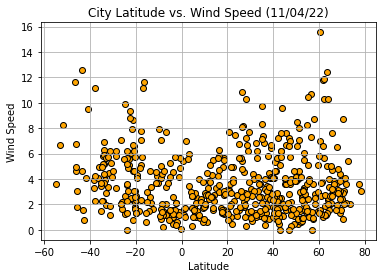

In [25]:
y_axiswind = clean_city_data['Wind Speed']
plt.scatter(x_axislat, y_axiswind, color = 'orange', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (11/04/22)')
plt.grid()
plt.savefig('Lat vs Wind Speed.png')
plt.show()

## Linear Regression

In [50]:
north_hem_frame = clean_city_data.loc[clean_city_data['Latitude']>0]
south_hem_frame = clean_city_data.loc[clean_city_data['Latitude']<0]

557

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.7190580481330536


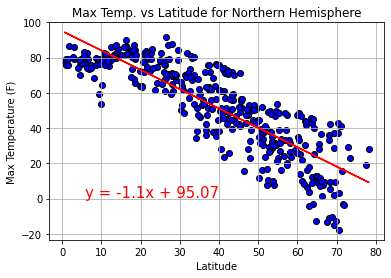

In [102]:
x_axisnorthlat = north_hem_frame['Latitude']
y_axisnorthmaxtemp = north_hem_frame['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axisnorthlat, y_axisnorthmaxtemp)
regress_values = x_axisnorthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axisnorthlat, y_axisnorthmaxtemp, color = 'blue', edgecolor = 'black')
plt.plot(x_axisnorthlat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temp. vs Latitude for Northern Hemisphere')
plt.grid()
plt.savefig('Lat vs Max_Temp (North).png')
print(f'The r squared value is {rvalue**2}')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value is 0.4084229789947995


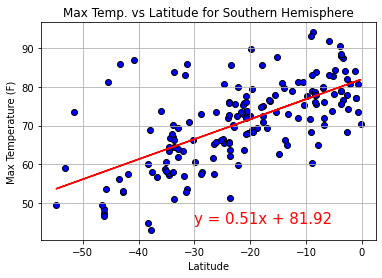

In [103]:
x_axissouthlat = south_hem_frame['Latitude']
y_axissouthmaxtemp = south_hem_frame['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axissouthlat, y_axissouthmaxtemp)
regress_values = x_axissouthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axissouthlat, y_axissouthmaxtemp, color = 'blue', edgecolor = 'black')
plt.plot(x_axissouthlat,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temp. vs Latitude for Southern Hemisphere')
plt.grid()
plt.savefig('Lat vs Max_Temp (South).png')
print(f'The r squared value is {rvalue**2}')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.15420142015197563


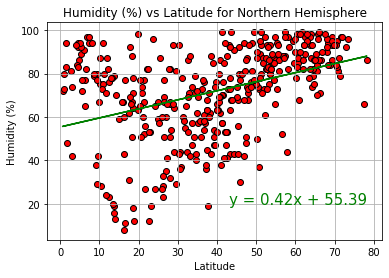

In [104]:
y_axisnorthhumid = north_hem_frame['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axisnorthlat, y_axisnorthhumid)
regress_values = x_axisnorthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axisnorthlat, y_axisnorthhumid, color = 'red', edgecolor = 'black')
plt.plot(x_axisnorthlat,regress_values,"g-")
plt.annotate(line_eq,(43,20),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude for Northern Hemisphere')
plt.grid()
plt.savefig('Lat vs Humidity (%) (North).png')
print(f'The r squared value is {rvalue**2}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value is 0.009306511866121029


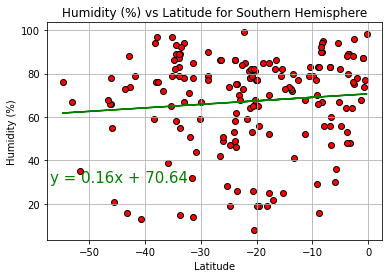

In [105]:
y_axissouthhumid = south_hem_frame['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axissouthlat, y_axissouthhumid)
regress_values = x_axissouthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axissouthlat, y_axissouthhumid, color = 'red', edgecolor = 'black')
plt.plot(x_axissouthlat,regress_values,"g-")
plt.annotate(line_eq,(-57,30),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs Latitude for Southern Hemisphere')
plt.grid()
plt.savefig('Lat vs Humidity (%) (South).png')
print(f'The r squared value is {rvalue**2}')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.03555346223381623


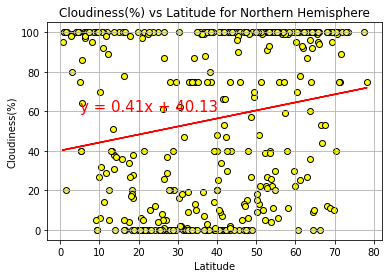

In [106]:
y_axisnorthcloud = north_hem_frame['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axisnorthlat, y_axisnorthcloud)
regress_values = x_axisnorthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axisnorthlat, y_axisnorthcloud, color = 'yellow', edgecolor = 'black')
plt.plot(x_axisnorthlat,regress_values,"r-")
plt.annotate(line_eq,(5,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness(%) vs Latitude for Northern Hemisphere')
plt.grid()
plt.savefig('Lat vs Cloudiness(%) (North).png')
print(f'The r squared value is {rvalue**2}')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value is 0.017063401581959414


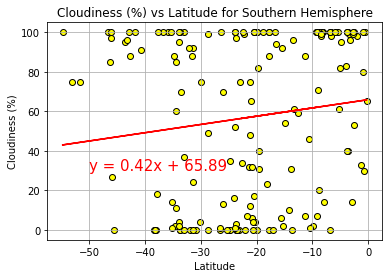

In [107]:
y_axissouthcloud = south_hem_frame['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axissouthlat, y_axissouthcloud)
regress_values = x_axissouthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axissouthlat, y_axissouthcloud, color = 'yellow', edgecolor = 'black')
plt.plot(x_axissouthlat,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness (%) vs Latitude for Southern Hemisphere')
plt.grid()
plt.savefig('Lat vs Cloudiness (%) (South).png')
print(f'The r squared value is {rvalue**2}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.013782908567527043


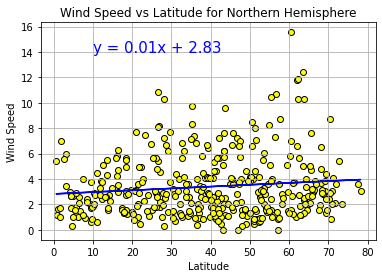

In [108]:
y_axisnorthwind = north_hem_frame['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axisnorthlat, y_axisnorthwind)
regress_values = x_axisnorthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axisnorthlat, y_axisnorthwind, color = 'yellow', edgecolor = 'black')
plt.plot(x_axisnorthlat,regress_values,"blue")
plt.annotate(line_eq,(10,14),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude for Northern Hemisphere')
plt.grid()
plt.savefig('Lat vs Wind Speed (North).png')
print(f'The r squared value is {rvalue**2}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value is 0.11092850038215796


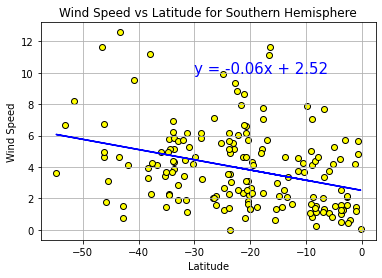

In [110]:
y_axissouthwind = south_hem_frame['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axissouthlat, y_axissouthwind)
regress_values = x_axissouthlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axissouthlat, y_axissouthwind, color = 'yellow', edgecolor = 'black')
plt.plot(x_axissouthlat,regress_values,"blue")
plt.annotate(line_eq,(-30,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude for Southern Hemisphere')
plt.grid()
plt.savefig('Lat vs Wind Speed (South).png')
print(f'The r squared value is {rvalue**2}')
plt.show()